## Step 1: Download images of birds and non-birds

In [5]:
# Skip this cell if you already have duckduckgo_search installed
!pip install -Uqq duckduckgo_search

duckduckgo_search da photos da search kawal da para di.

search_images yew dasi function di sha ddg_images pa zarya bandi images search ka ye,
aw bia da agha images urls pa list ki return ka ye 

In [6]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=200): return L(ddg_images(term, max_results=max_images)).itemgot('image')

was muzh yew bird image search kawo, senga shi search_images list return ka ye no 0 index bi niwakhlo

In [7]:
urls = search_images('bird photos', max_images=1)
urls[0]

'https://www.highreshdwallpapers.com/wp-content/uploads/2014/05/Colourful-Flying-Bird.jpg'

was da agha 0 index image ra download kizhi da download_url pa zarye

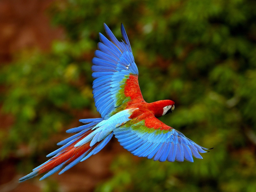

In [8]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

was agha rakam da forest dapara

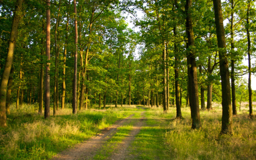

In [9]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

was 600 images da dawarho dapara ra download kawo,senga shi search_images default 200 images search ka ye aw urls pa list ki return kaye 

no ba download_images pa zarya sra pa bird_or_not folder da khapal category pa nama pa folder ki ba ra download ki

In [10]:
searches = 'forest','bird'
path = Path('bird_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

## Step 2: Train our model

get_image_files da yew folder sa garda images name return ka ye  

bia da agha images ba muzh pa verify_images sra verify ko shi images di ka na, ka na wol no ba per tolo bandi ba da map function pa zarya sra Path.unlink function apply ko

In [11]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

70

da model da training dapara dataloder pakar di. data loader train aw validation ( da model da accuracy dapara ) set return ka ye

DataBlock yew mid level api di. shi blocks zamozh data reperesent kaye. zamozh pa case ki da ImageBlock da input dapara aw CategoryBlock da labels dapara. get_items input data rakhli. splitter validation aw training set sra jla ka ye. get_y label rakhli. item_tfms per input data bandi different transform apply ka ye.

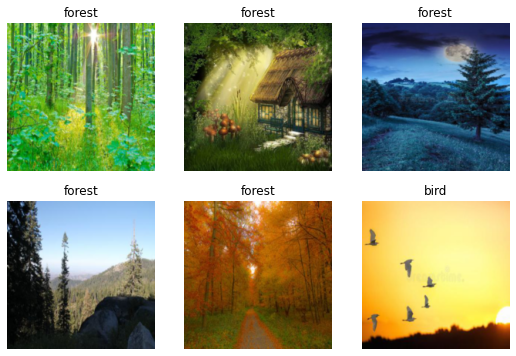

In [12]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

vision_learner  resnet18 ya yew bal model per dataloders bandi train ye.

In [14]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

## Step 3: Use our model (and build your own!)

learn.predict image clasify ka ye

In [ ]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000
